<a href="https://colab.research.google.com/github/berkaycamur/data_science_projects/blob/main/NLP_Project_with_Restaurant_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [419]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
!pip install contractions
import contractions
from tensorflow import keras
import re

In [420]:
df_2 = pd.read_csv("Restaurant_Reviews.tsv.txt", sep = "\t" )
df = df_2.copy()

In [421]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [422]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df['Review'] = df['Review'].apply(lambda x : contractions.fix(x))#fixed contractions
df['Review'] = df['Review'].apply(lambda x : x.lower()) #make all letters lowercase
df['Review'] = df['Review'].apply(lambda x : re.sub(r'[^\w\s]', '', x)) #removing 
df['Review'] = df['Review'].apply(lambda x : word_tokenize(x)) #tokenizing of the words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [423]:
df.Review.head()

0                            [wow, loved, this, place]
1                               [crust, is, not, good]
2    [not, tasty, and, the, texture, was, just, nasty]
3    [stopped, by, during, the, late, may, bank, ho...
4    [the, selection, on, the, menu, was, great, an...
Name: Review, dtype: object

In [424]:
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [425]:
nltk_stopwords = set(stopwords.words('english'))
gensim_stopwords = set(STOPWORDS)

all_stopwords = nltk_stopwords.union(gensim_stopwords)
all_stopwords.remove("not")
print("Length of all stopwords:",len(all_stopwords))
print("Is word of 'the' in the stopwords?", "the" in all_stopwords )

Length of all stopwords: 389
Is word of 'the' in the stopwords? True


In [426]:
def list2string(s): 
    str1 = " " 
    return (str1.join(s))

In [427]:
df['Review'] = df['Review'].apply(lambda x : list2string(x))

In [428]:
df['Review'].head()

0                                 wow loved this place
1                                    crust is not good
2             not tasty and the texture was just nasty
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
Name: Review, dtype: object

In [429]:
#Removing stopwords
for index in range(1000):
    df['Review'][index] = df['Review'][index].split()
    for word_index in range(len(df['Review'][index]) - 1):
        for word in df['Review'][index]:
            if word in all_stopwords:
                df['Review'][index].remove(word)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [430]:
df[['Review']].head(24)

,Review
0,"[wow, loved, place]"
1,"[crust, not, good]"
2,"[not, tasty, texture, nasty]"
3,"[stopped, late, bank, holiday, rick, steve, re..."
4,"[selection, menu, great, prices]"
5,"[getting, angry, want, damn, pho]"
6,"[honeslty, not, taste, fresh]"
7,"[potatoes, like, rubber, tell, ahead, time, ke..."
8,"[fries, great]"
9,"[great, touch]"


In [431]:
#df_2.head() -> I wanted to compare orginal texts with proceed text

## LEMMATIZATION AND STEMMING 

In [432]:
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

df['Review'] = df['Review'].apply(lambda x : list2string(x))

snowball_stemmer = SnowballStemmer(language = "english")
wordnet_lemmatizer = WordNetLemmatizer()

df['Review'] = df['Review'].apply(lambda x : wordnet_lemmatizer.lemmatize(x))
df['Review'] = df['Review'].apply(lambda x : snowball_stemmer.stem(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [433]:
df[['Review']].head(24)

,Review
0,wow loved plac
1,crust not good
2,not tasty texture nasti
3,stopped late bank holiday rick steve recommend...
4,selection menu great pric
5,getting angry want damn pho
6,honeslty not taste fresh
7,potatoes like rubber tell ahead time kept warm
8,fries great
9,great touch


In [434]:
from textblob import TextBlob

def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

df['subjectivity_score'] = pd.Series(df['Review'].apply(lambda x : getSubjectivity(x)))
df['polarity_score'] = pd.Series(df['Review'].apply(lambda x : getPolarity(x)))

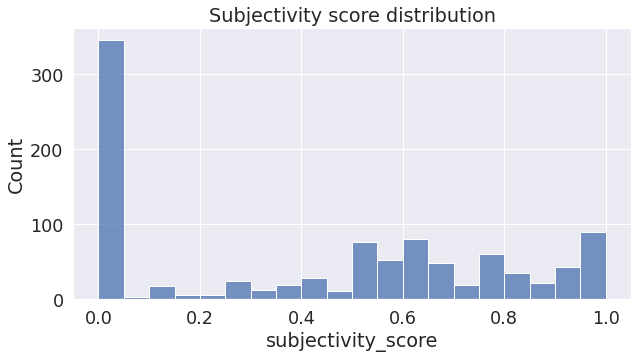

In [435]:
import seaborn as sns 
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
sns.set(font_scale = 1.6)
sns.histplot(x = df['subjectivity_score'], bins= 20).set_title("Subjectivity score distribution");

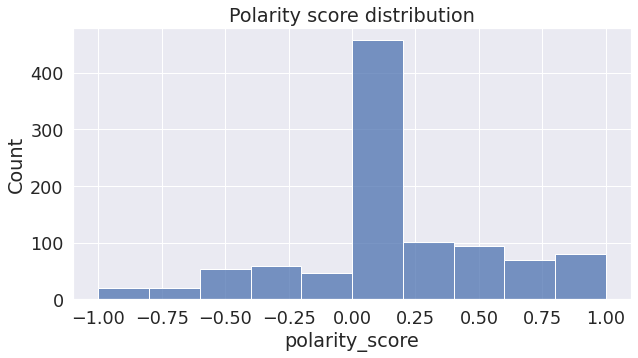

In [436]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
sns.set(font_scale = 1.6)
sns.histplot(x = df['polarity_score'], bins= 10).set_title("Polarity score distribution");

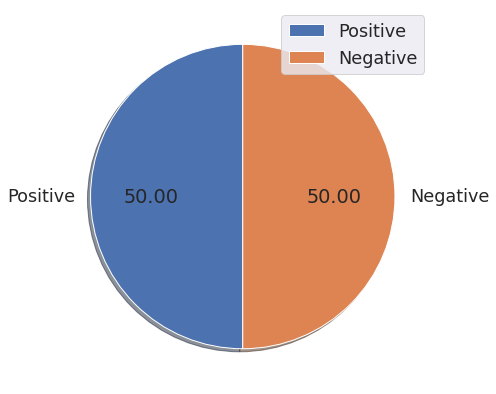

In [437]:
negative_reviews = df[ df['Liked'] == 0]
positive_reviews = df[ df['Liked'] == 1]

pie_labels = ["Positive", "Negative"]
y = np.array([len(negative_reviews), len(positive_reviews)])
plt.figure(figsize = (19, 7))
plt.pie(y, labels = pie_labels, startangle = 90, shadow = True, autopct='%.2f')
plt.legend(loc = "best")
plt.show()

##DEEP LEARNING MODEL

#Preparing Data

In [438]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [439]:
x = df['Review'].values
y = df['Liked'].values
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.3, shuffle = True)

print("Shape of the x_train:", x_train.shape)
print("Shape of the x_test: ", x_test.shape)

Shape of the x_train: (700,)
Shape of the x_test:  (300,)


In [440]:
tokenizer = Tokenizer(num_words= 10000, oov_token= "<OOV>", lower= False)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_train = np.array(x_train)
padded_trainx = pad_sequences(x_train, padding = "post", maxlen = 100)


tokenizer.fit_on_texts(x_test)
x_test = tokenizer.texts_to_sequences(x_test)
x_test = np.array(x_test)
padded_testx = pad_sequences(x_test, padding = "post", maxlen = 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


In [441]:
padded_trainx[np.random.randint(0,699)].shape

(100,)

In [442]:
padded_testx[1]

array([1554,   20,  100,  667,  668,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [443]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 12, input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy', optimizer= "adam", metrics=['accuracy'])

In [444]:
y_train = np.array(y_train)
y_test = np.array(y_test)
history = model.fit(padded_trainx, y_train, epochs= 100, validation_data=(padded_testx, y_test), verbose=2)

Epoch 1/100
22/22 - 1s - loss: 0.6935 - accuracy: 0.4857 - val_loss: 0.6932 - val_accuracy: 0.4633 - 858ms/epoch - 39ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6927 - accuracy: 0.5357 - val_loss: 0.6937 - val_accuracy: 0.4733 - 79ms/epoch - 4ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6928 - accuracy: 0.5171 - val_loss: 0.6937 - val_accuracy: 0.4733 - 84ms/epoch - 4ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6924 - accuracy: 0.5100 - val_loss: 0.6939 - val_accuracy: 0.4733 - 99ms/epoch - 5ms/step
Epoch 5/100
22/22 - 0s - loss: 0.6924 - accuracy: 0.5129 - val_loss: 0.6937 - val_accuracy: 0.4733 - 91ms/epoch - 4ms/step
Epoch 6/100
22/22 - 0s - loss: 0.6917 - accuracy: 0.5143 - val_loss: 0.6937 - val_accuracy: 0.4733 - 91ms/epoch - 4ms/step
Epoch 7/100
22/22 - 0s - loss: 0.6913 - accuracy: 0.5529 - val_loss: 0.6929 - val_accuracy: 0.4833 - 82ms/epoch - 4ms/step
Epoch 8/100
22/22 - 0s - loss: 0.6906 - accuracy: 0.5657 - val_loss: 0.6931 - val_accuracy: 0.4733 - 88ms/epoch - 4ms/step
Epoch 9/100
22

In [445]:
model.evaluate(padded_testx, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 1.1633 - accuracy: 0.6167


[1.1633265018463135, 0.6166666746139526]

In [461]:
sentence = ["I did not like this restaurant", "This restaurant was really good", "That restaurant was kinda trash", "Delicious foods", "Crazy about all these foods"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=100, padding="post")
print(model.predict(padded))

[[0.05607855]
 [0.78780496]
 [0.23600966]
 [0.76181257]
 [0.74524266]]
